In [39]:
# importo las librerias que voy a usar

import numpy as np
from sympy import atan2
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.animation as animation
plt.ion
import ipywidgets as iwy
sns.set_theme()

## Ejercicio 5
$(ii)$ Calcule los puntos de inflexión para este perfil en términos de $\alpha=a / L$. Sabiendo que $|z| \leq \alpha$ y usando el criterio de Rayleigh, ¿para que valores de $\alpha$ espera que el fujo sea estable? \newline

$(iii)_{(N)}$ Obtenga la relación de dispersión $\omega(k)=\omega_0(k)+i \gamma(k)$ para valores de $0,5 \leq \alpha \leq 2$, variando los valores del número de onda adimensional $0<k^{\prime} \leq 2,5$ y con $d z=5 \times 10^{-3}$. Relacione el resultado con lo obtenido en el inciso anterior. Ayuda: $A l$ igual que en el Problema 4 , evite $k^{\prime}=0$.

In [3]:
# parámetros y array de las funciones que calculas los omegas
dk = 0.025
K = np.arange(dk, 2.5 + dk, dk)
da = 0.25
Alpha = np.arange(0.5, 2 + da, da)

# paso en z según enunciado
dz = 5e-3

# acá guardo los omega
Ws = {}

In [6]:
# recorro los distintos valores de alpha y calculo los omegas
for alpha in Alpha:
    zs = np.arange(-alpha + dz, alpha, dz)   # Discretizo z
    U = u(zs)                                # Calculo las velocidades
    Upp = upp(zs)                            # Calculo la derivada segunda  U''

    W = []                                   # Creo una lista donde guardar los omega de cada k
    for k in K:                              # Itero en K
        M, L = construir_matrices_inestabilidades(zs, U, Upp, k)    # Calculo las matrices
        w = omega(M, L, k)                                          # Calculo omega
        W.append(w)                                                 # Lo sumo a la lista de omegas

    W = np.array(W)                                               # Convierto en array mi lista
    Ws[alpha] = W                                                 # Agrego el array de frecuencias al diccionario

In [27]:
# uso una paleta para la parte real y otra para la imaginaria
palet_R = sns.color_palette("flare", Alpha.size)
palet_I = sns.color_palette("Blues", Alpha.size)


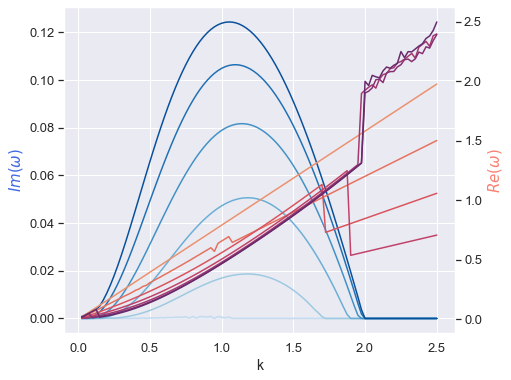

In [40]:
sns.set_style("dark")
fig,ax = plt.subplots(figsize=(7,6))

#ax.set_title("$ \omega $")
# ploteo recorriendo los distintos alphas
ax.grid()
for i in range(len(Ws)):
    alpha = Alpha[i]
    ax.plot(K, Ws[alpha].imag, color=palet_I[i], label = r'$\alpha$ = {alpha}'.format(alpha = alpha))

ax.set_xlabel(r"k", fontsize = 14)
ax.set_ylabel("$Im(\omega)$",color="royalblue",fontsize=15)
ax.tick_params(axis='both', labelsize=13)

ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=13)
for i in range(len(Ws)):
    alpha = Alpha[i]
    ax2.plot(K, Ws[alpha].real, color=palet_R[i], label = r'$\alpha$ = {alpha}'.format(alpha = alpha))
ax2.set_ylabel("$Re(\omega)$",color="salmon",fontsize=15)
plt.show()

### Ejercicio 10
(iv)

In [77]:
#defino parametros

g=9.8
h=1
h_prime=1
rho=1
rho_2=rho/2

ks = np.logspace(-2, 2, 30)

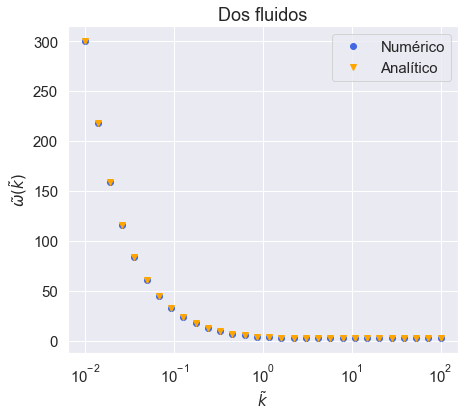

In [92]:
# calculo los omegas de manera numerica para distintos valores de k
omegas_N=[]
for k in ks:
    resultado = np.max(omega_numerico(k))
    omegas_N.append(resultado)

# calculo los omegas de manera analitica para distintos valores de k
omegas_A=[]
for k in ks:
    resultado = omega_analitico(k)
    omegas_A.append(resultado)
    
sns.set_style("darkgrid")
plt.figure(figsize=(7,6))
plt.title('Dos fluidos', fontsize=18)
plt.plot(ks,omegas_N,'o',color="royalblue",label="Numérico")
plt.plot(ks,omegas_A,'v',color="orange",label="Analítico")
plt.xlabel(r"$\tilde{k}$",fontsize=15)
plt.ylabel(r"$\tilde{\omega}(\tilde{k})$",fontsize=15)
plt.xscale('log')
plt.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=15)
plt.show()

$(v)$

C:\Users\Luna\anaconda3.2\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


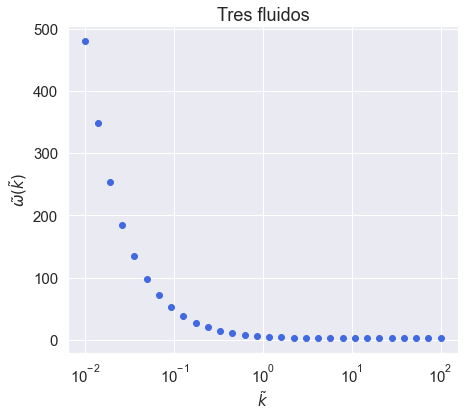

In [93]:

# defino los parametros
g=9.8
h=1
rho=1
rho_2=rho/2
rho_3=rho/10

ks = np.logspace(-2, 2, 30)

A = []
for k in ks:
    resultado = np.max(omega_3f(k))  # Tomando el valor absoluto y utilizando np.abs para obtener el máximo
    A.append(resultado)


sns.set_style("darkgrid")
plt.figure(figsize=(7,6))
plt.title('Tres fluidos', fontsize=18)
plt.plot(ks,A,'o',color="royalblue")
plt.xlabel(r"$\tilde{k}$",fontsize=15)
plt.ylabel(r"$\tilde{\omega}(\tilde{k})$",fontsize=15)
plt.xscale('log')
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [87]:
#FUNCIONES DEL EJERCICIO 10

def omega_numerico(k):
    L=np.array([[0, 0], [np.cosh(k*h), -np.cosh(k*h_prime)*rho_2/(rho)]]) #genero la matriz proporcional a w^2/kg
    M=np.array([[np.sinh(k*h), np.sinh(k*h_prime)], [np.sinh(k*h), np.sinh(k*h_prime)*rho_2/(rho)]]) #genero la matriz que depende de k
    N= np.linalg.inv(M)
    B= np.dot(N, L)
    v=np.linalg.eigvals(B)
    return v

def omega_analitico(k):
    w_cuadrado=-g*k*(rho_2-rho)/(rho/np.tanh(k*h)+rho_2/np.tanh(k*h_prime))
    return k*g/w_cuadrado

def omega_3f(k):
    L_2 = np.array([[0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [np.cosh(k * h), -rho_2 * np.cosh(k * h) / rho, -rho_2 * np.cosh(k * h) / rho, 0],
                  [0, -rho_2 * np.cosh(1.9 * k * h) / rho, -rho_2 * np.cosh(0.1 * k * h) / rho,
                   rho_3 * np.cosh(0.1 * k * h) / rho]])

    M_2 = np.array([[np.sinh(k * h), -np.sinh(k * h), np.sinh(k * h), 0],
              [0, -np.sinh(1.9 * k * h), np.sinh(0.1 * k * h), -np.sinh(0.1 * k * h)],
              [np.sinh(k * h), -rho_2 * np.sinh(k * h) / rho, rho_2 * np.sinh(k * h) / rho, 0],
              [0, -rho_2 * np.sinh(1.9 * k * h) / rho, rho_2 * np.sinh(0.1 * k * h) / rho,
               -rho_3 * np.sinh(0.1 * k * h) / rho]])

    N_2 = np.linalg.inv(M_2)
    B_2 = np.dot(N_2, L_2)
    v_2 = np.linalg.eigvals(B_2)
    return v_2

In [5]:
# FUNCIONES DEL EJERCICIO 5

def construir_matrices_inestabilidades(zs, U, Upp, k):
    """
    Construye las matrices M y L asociadas al problema de Rayleigh en términos
    del perfil de velocidades, la discretización espacial y el número de onda.

    Parámetros:
      zs : Discretización del espacio (sin incluir los bordes)
      U  : Perfil de velocidades evaluado sobre los zs
      Upp: Derivada segunda del perfil evaluada sobre los zs
      k  : Número de onda de la perturbación
    """
    dz = zs[1] - zs[0]
    N = U.size

    Ld = - 2*U - dz**2*(U*k**2 + Upp)                            # DIAGONAL DE L
    Lup = U[:-1]                                                 # DIAG SUP DE L
    Llow = U[1:]                                                 # DIAG INF DE L
    L = np.diag(Ld,k=0) + np.diag(Lup,k=1) + np.diag(Llow,k=-1)  # CONSTRUCCIÓN DE L

    # COMPLETAR LA MATRIZ M
    Md = np.ones(N) * (-2 - dz**2 * k**2)                        # DIAGONAM DE M
    Mup = np.ones(N-1)                                           # DIAG SUP DE M
    Mlow = np.ones(N-1)                                          # DIAG INF DE M
    M = np.diag(Md,k=0) + np.diag(Mup,k=1) + np.diag(Mlow,k=-1)  # CONSTRUCCIÓN DE M

    return M, L

def omega(M, L, k):
    """
    Calcula los autovectores y autovalores del problema a partir de
    M y L, a los últimos los divide por k para obtener w y devuelve
    solo la frecuencia del modo más inestable.
    """
    A = np.matmul(np.linalg.inv(M), L) # DEFINIR LA MATRIZ A = M^(-1)L
    eigval, eigvect = np.linalg.eig(A) # CALCULAR AUTOVALORES Y AUTOVECTORES
    w = eigval*k                       # CALCULO LAS FRECUENCIAS
    idx = np.argmax(w.imag)            # BUSCO LA FRECUENCIA MAS INESTABLE
    return w[idx]

def sech(x):
    return 1/np.cosh(x)


def u(z):
    return sech(z)**2

def upp(z):
    tz = np.tanh(z)
    sz = sech(z)
    return 4 * tz**2 * sz**2 - 2 * sz**4